
# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description of my dataset

    This dataset was originally taken from the movie data base.[TMDB].(https://www.themoviedb.org/about) .
    This dataset catains data about movies from 1960 to 2015.
    Each row represents one movie and contains data about it in the correspondind columns as:-
    Revenue >> which is the total amount of money returned back to producers ( may be more or less than the budget ).
    Budget >> total money spent on the movie during prodduction.
    Name of the director.
    Genre type >> Action / Drama / Thriller / .... .
    Title of movie
    Runtime >> it is the duratio  of the movie.
    votings >> represented by two columns named 'vote_count' and 'vote_averge' >> they both represent the rating and number of people voted for each movie.
    I chose this dataset after surfing through many datasets as it seemed interesting and fun working on it and learning too :)


### Question(s) for Analysis

    In this report i will explore the following questions
    1- Which genres aremost popular from year to year?
    2- What kinds of properties are associated with movies that have high revenues?
    3- Average profit of movies each year?
    4- Do higher budget movies always generate big revenue?

    The Genres and profits are dependent variables ( profits are generated from 'revenue - budget') , year of release and runtime are independent variable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [17]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


## exploring data 
    In this section i will try to explore my data and know every possible info about data skelton as type  of data in each column , structure as  number of column and rows 
    also exploring name of columns to decide what i need and what to remove 
    exploring duplicates and null values t take the right decission dealing with them 
    many steps ar taken here just to explore and get deeper in my dataset to know what to ask and how to do it

In [3]:
orig_df = pd.read_csv('tmdb-movies.csv')


In [6]:
orig_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [27]:
orig_df.shape

(10866, 21)

In [28]:
orig_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
orig_df.duplicated().sum()

1

In [8]:
orig_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 


    NOW I WILL CLEAN THE DUPLICATES AND REMOVE THE COLUMNS THAT I WONT NEED ACCORDING TO THE QUESTIONS I WILL ANSWER

In [93]:
orig_df.drop_duplicates(inplace = True)

In [94]:
orig_df.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','budget_adj','revenue_adj'],axis=1,inplace=True) 

In [95]:
orig_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [100]:
orig_df.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [97]:
orig_df.drop(['production_companies'],axis=1,inplace=True)

In [98]:
orig_df.dropna(axis=0,inplace=True)

In [99]:

orig_df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [101]:
# I WILL CHANGE RELEASE DATE TO DATE TIME TO USE IT IN MY QUESTIONS
orig_df.release_date = pd.to_datetime(orig_df['release_date'])


## how i cleaned the data? and why?
     In that secion i did many steps to be usre that my dataset is clean
     1- I dropped the following columns ('id','imdb_id','cast','homepage','tagline','keywords','overview','budget_adj', 'revenue_adj','prodiction_companies'), using drop columns method >> i removed the columns  that i won't need as it contains irrelevant ifo to my questions such as id, cast and key words, also some columns contain alot of missing data or null values that will ruin my analysis and would generate wrong results and massive right or left skewing as 'production_companies' column.
     
     2- The dataset contained one duplicate, so i decided to delete it using delete suplicates method ,as this wont affect the analysis of data set.
     
     3- I changed the 'release_date' column data type ( from integer to 'datetime') using pandas date to time method, as it is more useful and easier to analyse and coclude info from it
     
     4- The column names were all written with lower case letters and seperated by ('_'), so ididn't need to modify any of them. 
     
     5- later during analysis i will create new column in calleds 'profits' for my third question to know the average profit in each year from 1960 till 2015.
     
     6- during analysis i i will extract most popular genres across the year from the column 'genres', to know exactly what types are most directed to least type. to answer my 2nd question.
     

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015
5,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,2015-12-25,3929,7.2,2015
6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction,2015-06-23,2598,5.8,2015
7,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama,2015-09-30,4572,7.6,2015
8,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family,2015-06-17,2893,6.5,2015
9,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy,2015-06-09,3935,8.0,2015


<a id='eda'></a>
#### Exploratory Data Analysis


# Research Question 1 Which genres are most popular from year to year ?)

### first we will make a function to split the column genres and from it we will know every count of each genre
### I will make a copy and work on it to avoid any destruction to my original data

In [33]:
genres_df=orig_df.copy()

In [34]:

def separator(column):
    separator = genres_df[column].str.cat(sep = "|")
    separator = pd.Series(separator.split("|"))
        #   i will make them from the largest number to smallest for easy reading
    counts = separator.value_counts(ascending = False)
    return counts

    #function which will take any column as argument from and keep its track 


In [35]:
final_genres=separator('genres')


In [33]:
final_genres

Drama              4754
Comedy             3782
Thriller           2904
Action             2378
Romance            1708
Horror             1636
Adventure          1466
Crime              1353
Science Fiction    1223
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
dtype: int64

    This table proviedes info about number of movie types generated across the years, and arranged from the most directed type which is Drama , to the least directed type which is TV Movie.

In [34]:
final_genres.head(10)
# The top 10 most popular genres through the years

Drama              4754
Comedy             3782
Thriller           2904
Action             2378
Romance            1708
Horror             1636
Adventure          1466
Crime              1353
Science Fiction    1223
Family             1223
dtype: int64

In [36]:
years = genres_df['release_year'].unique()
years.sort()
print(years)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


    I did this step to generate the years and know exaclty the the start and end of info during years to use it in my conclusion.

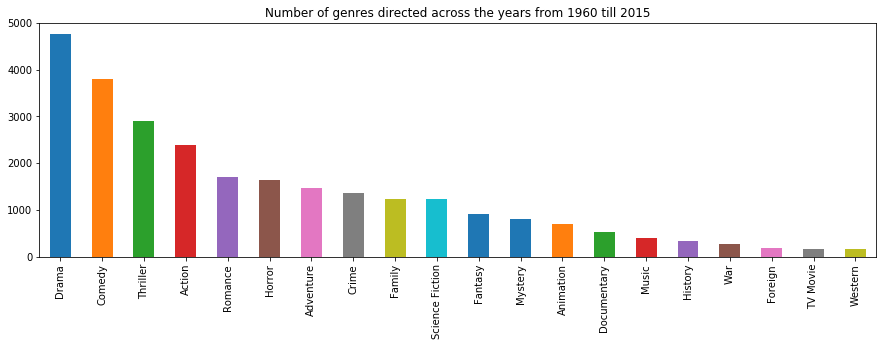

In [41]:
final_genres.plot(kind='bar', figsize=(15,4.3) , title=('Number of genres directed across the years from 1960 till 2015'));



    This chart represents the most directed movie types from 1960 till 2015, from reading the data, every row has its unique types of genres , so the number of each genre represents the number of movies related to that genre without any bias, so we can conclude clearly that these are the top 5 genres from 1960 to 2015 as an answer to this questions 
#1st >> Drama
#2nd >> Comedy
#3rd >> Thriller
#4th >> Action
#5Th >> Romance

# Research Question 2  (What kinds of properties are associated with movies that have high revenues?)


# I will  make a copy and investigate more

In [10]:
reven_df=orig_df.copy()

In [11]:
reven_df.revenue.mean()

39823319.793392234

In [12]:
high_reven=reven_df.query('revenue > 40065576.46990741')

In [87]:
# this dataframe has the highest revenue movies

In [13]:
high_reven.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


    This table represents the movies with revenue above the average revenues
    I decided to make a data set with high revenues only ( above-average ones) which will give us more clear image image about the properties of them and their relation to various variably as vote count as an example.

In [88]:
# the following scatter grapghs describe the diff properties of the high revenue movies

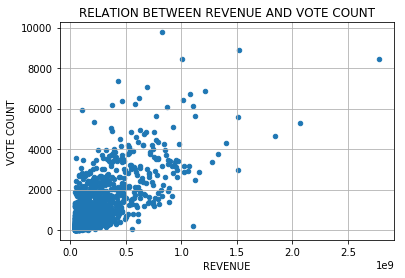

In [117]:
high_reven.plot.scatter(x= 'revenue', y= 'vote_count')
plt.legend()
plt.xlabel('REVENUE')
plt.ylabel('VOTE COUNT')
plt.title('RELATION BETWEEN REVENUE AND VOTE COUNT')
plt.grid(True);


    This grapgh shows positive relation, in explanation i would say that the vote counts represent number of votings from individuals, clearly the more people voting the more popular the movies gets and more revenue in return

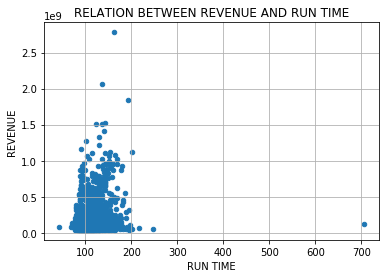

In [120]:
high_reven.plot.scatter(y= 'revenue', x = 'runtime')
plt.legend()
plt.ylabel('REVENUE')
plt.xlabel('RUN TIME')
plt.title('RELATION BETWEEN REVENUE AND RUN TIME')
plt.grid(True);

    This grapgh clearly shows that movies with runtime ranging from 100 to 200 minutes tend to get high revenues than most of other movies like that movies with run time more than 700 minutes clearly has low revenues. 

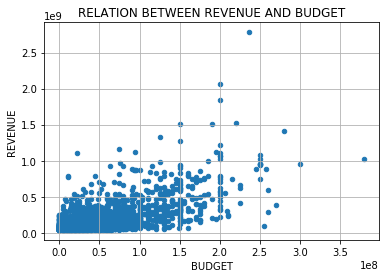

In [121]:
high_reven.plot.scatter(y = 'revenue', x= 'budget')
plt.legend()
plt.ylabel('REVENUE')
plt.xlabel('BUDGET')
plt.title('RELATION BETWEEN REVENUE AND BUDGET')
plt.grid(True);

    This graph shows that high revenue movies are more likely to have high production budget

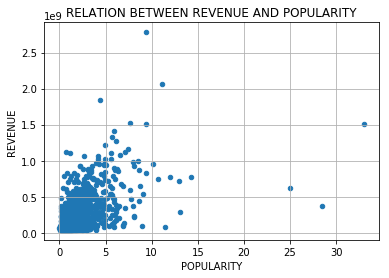

In [122]:
high_reven.plot.scatter(y = 'revenue', x = 'popularity')
plt.legend()
plt.ylabel('REVENUE')
plt.xlabel('POPULARITY')
plt.title('RELATION BETWEEN REVENUE AND POPULARITY')
plt.grid(True);

    This graph show thay the more the popularity of movie the higher the revenue it gets and it makes sense, as more people will search and pay money to watch that movie.

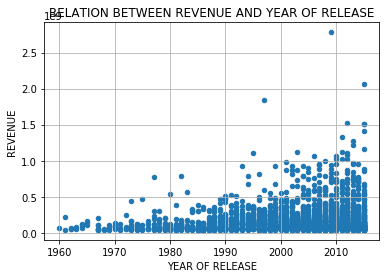

In [123]:
high_reven.plot.scatter(y = 'revenue', x = 'release_year')
plt.legend()
plt.ylabel('REVENUE')
plt.xlabel('YEAR OF RELEASE')
plt.title('RELATION BETWEEN REVENUE AND YEAR OF RELEASE')
plt.grid(True);

    This grapgh clearly shows that the movie industry is getting bigger and bigger every year and the revenues of all movies each year are growing each year.

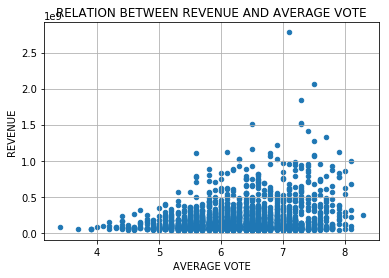

In [124]:
high_reven.plot.scatter(y = 'revenue', x = 'vote_average')
plt.legend()
plt.ylabel('REVENUE')
plt.xlabel('AVERAGE VOTE')
plt.title('RELATION BETWEEN REVENUE AND AVERAGE VOTE')
plt.grid(True);

    disregarding the outliers, this graph shows that movies with higher ratings in averge tend to have higher revenues in return.

# Research Question 3  (average profit of movies each year?)

In [16]:
avg_df=orig_df.copy()

In [17]:
avg_df['profits']= avg_df['revenue'] - avg_df['budget']

In [18]:
avg=avg_df.groupby('profits')['release_year'].mean()

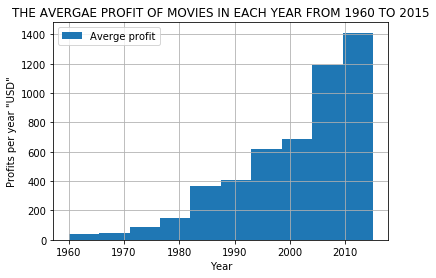

In [125]:
plt.hist(avg , label='Averge profit')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Profits per year "USD"')
plt.title('THE AVERGAE PROFIT OF MOVIES IN EACH YEAR FROM 1960 TO 2015')
plt.grid(True)


    This grapgh shows an answer to our question that clearly every year the movie industry is growing as well as the movie profits are getting bigger

# Research Question 4  (Do higher budget movies always generate big revenue?)

    i will make a cope to work on and then generate a new dataframe that represents the movies with budget more than the average. then create a scatter plot to know exactly what to conclude.

In [104]:
high_bd=orig_df.copy()

In [105]:
high_bd.budget.mean()

14711137.323055556

In [106]:
high_budget=high_bd.query('budget > 14625701.094146879 ')


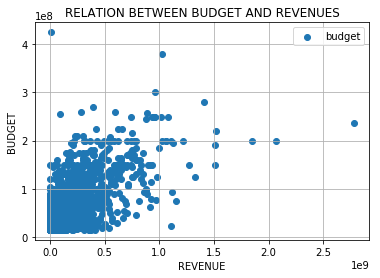

In [108]:
plt.scatter(x=high_budget.revenue, y=high_budget.budget)
plt.legend()
plt.xlabel('REVENUE')
plt.ylabel('BUDGET')
plt.title('RELATION BETWEEN BUDGET AND REVENUES')
plt.grid(True)


     In this graph we can clearly say that there is a posituve relation betwet budget and revenue
     However, Not always the high budget movies return high revenues as from the grapgh we see a alot of outliers with high buget and lower revenues 
     SO, we can say that in MOST OF MOVIES NOT ALWAYS , the higher thr budget the more the movies tend to return high revenues.

## conclusions
# 1
#after cleaning the data i answered the first question about popular genres and found that the most popular genre across the years is 
#1st >> Drama
#2nd >> Comedy
#3rd >> Thriller
#4th >> Action
#5Th >> Romance

# 2
#the 2nd question about movies with high revenues, i found that:
#1- revenue has positive relation with the number of people eager to vote
#2- revenue has positive relation with the popularity of the movies
#3- revenue as a number increses through the years, this has many variable as dollar infaltion and number of movies each year #so this relation needs more investigation
#4- high revenue movies recieve higher votings
#5- the revenue tends to be higher for movies betwen 1 and 2 hours

# 3
#the 3rd questoin was about the average profit of movies in each year
#apparentely the profits kept growing through the years

# 4
#The 4th question is about relation between revenues and budgets, we can clearly say the higher budget movies return higher revenues in most cases but NOT ALWAYS.

## Limitations
 #i faced different limitations in this dataset
 #1- there were alot of Null values that needs to be removed
 #2- alot of columns are not needed and needs to be removed
 #3- the column genres contains alot of types that recquired extra investigation



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

## resources
#1- udacity classes
#2- zoom meetings
#3-https://www.statology.org/pandas-scatter-plot/
#4-https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html